# Flu Vaccine Hesitancy : A Machine Learning Approach

## Overview


The likelyhood of getting H1N1 vaccination was predicted by classification using the logistic resgrssion and decission tree models.


A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Vaccination, as one of the most successful public health interventions led to the elimination and control of diseases that were once common throughout the world.Despite overwhelming medical evidence and the unanimous position of medical professionals in favor of vaccination, the number of people skeptical about vaccination has grown in many countries in recent years.The consequence of this alarming trend is a decline in immunization coverage.Several outbreaks of infectious diseases have been linked to undervaccinated communities.The problem of expanding vaccine rejection has begun to be so widespread that it became the subject of many studies aimed at understanding the sources and correlations of attitudes toward vaccination.

The aim of this study is to predict how likely individuals are to receive their H1N1 flu vaccine, specificlly, to predict the probabilities for  h1n1_vaccine. 
We beleive the prediction output of this study will give public health professionals and policy makers,as an end user, a clear undertadning of factors associated with low vaccination rates.This in turn, capacitiate end users to systematically act on those features hindering people to get vaccinated.
The methodologies used in these models can be used as a refernce for future work and also can be compared with differnt models for performce evaluation.
In cognizant of the data type we have and our objectives, classification using logistic regrssion model and decisssion tree will be implemented.
So as to classify exactly those who got h1n1 flu shot from those that does not, we need a higher accuracy of the model outpouts, which indirectly shows very low false postive(those who considered vaccinted but did actually not get h1n1 flu shot)rate.This will be further aseesed using the ROC curve and confusion matrix.  


End Users: Public health officials, and policy makers

True business problem:

Predicting who is vaccinated or not accuratly? (Deliverable: Model)
What are the factors that influence people get H1N1 vaccine or not? (Deliverable: Analysis)
Context:

False negative in this context: Saying people did not get the vaccine when they actually did.

Outcome: Not a big problem

False positive in this context: Saying people got the vaccine when they actually did not.

Outcome: Big problem

Evaluation: Which metric (of the ones we've explore so far) would make sense to primarily use as we evaluate our models?

Accuracy
Precision
Recall
F1-Score
We can focus on accuracy for ease of use, but should also be maximizing our Precision score and minimizing False Positives, because false positives are a much more costly mistake than false negatives.

## Data Understanding

Describe the data being used for this project.

Questions to consider:

- Where did the data come from, and how do they relate to the data analysis questions?
- What do the data represent? Who is in the sample and what variables are included?
- What is the target variable?
- What are the properties of the variables you intend to use?

In [83]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [84]:
pip install --upgrade category_encoders

Note: you may need to restart the kernel to use updated packages.


In [175]:
# importing tools to be used

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import category_encoders as ce

from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, plot_roc_curve, plot_confusion_matrix

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier   
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

## Data Understanding

Describe and justify the process for preparing the data for analysis.

Questions to consider:

- Were there variables you dropped or created?
- How did you address missing values or outliers?
- Why are these choices appropriate given the data and the business problem?
- Can you pipeline your preparation steps to use them consistently in the modeling process?

In [86]:
!ls ../../Data

LabelsandFeatures.txt
test_set_features.csv
training_set_features.csv
training_set_labels.csv


In [87]:
#import the data
fluvacc=pd.read_csv("../../Data/training_set_features.csv")

In [88]:
fluvacc.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [89]:
fluseas= pd.read_csv("../../Data/training_set_labels.csv")

In [90]:
fluseas.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [91]:
fluseas['seasonal_vaccine'].value_counts(normalize=True)

0    0.534392
1    0.465608
Name: seasonal_vaccine, dtype: float64

In [92]:
fluseas['h1n1_vaccine'].value_counts(normalize=True)

0    0.787546
1    0.212454
Name: h1n1_vaccine, dtype: float64

In [93]:
df = fluvacc.merge(fluseas, how='left', on='respondent_id')
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [94]:
df.tail()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,0
26706,26706,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Not in Labor Force,mlyzmhmf,"MSA, Principle City",1.0,0.0,NaN,NaN,0,0


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [96]:
df.isna().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [97]:
df.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454,0.465608
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


In [98]:
df[[c for c in df.columns if df[c].dtype =='object']].describe()

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
count,26707,25300,26707,26707,22284,25299,24665,25244,26707,26707,13377,13237
unique,5,4,4,2,3,2,2,3,10,3,21,23
top,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",fcxhlnwr,xtkaffoo
freq,6843,10097,21222,15858,12777,13555,18736,13560,4297,11645,2468,1778


### EDA-Baseline Understaning 

In [99]:
# Exploring target distribution
df['h1n1_vaccine'].value_counts(normalize=True)

0    0.787546
1    0.212454
Name: h1n1_vaccine, dtype: float64

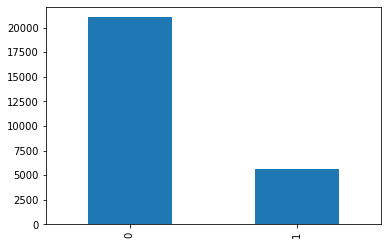

In [100]:
df['h1n1_vaccine'].value_counts().plot(kind='bar');

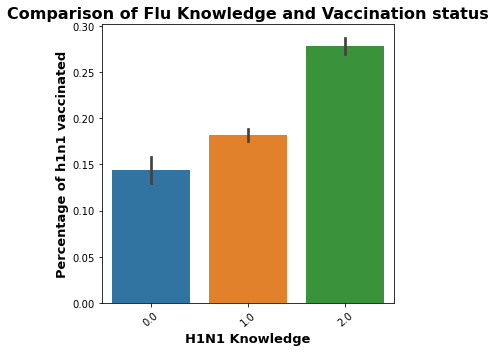

In [101]:
# Setting the size of the plot
plt.figure(figsize = (5,5))
# Creating the bar plot with X = h1n1_knowledge and Y = h1n1_vaccine
sns.barplot(data = df, x=df['h1n1_knowledge'], y=df['h1n1_vaccine'])
# Setting title and labels
plt.title('Comparison of Flu Knowledge and Vaccination status', fontsize=16, fontweight='bold')
plt.xlabel('H1N1 Knowledge', fontsize=13, fontweight='bold')
plt.ylabel('Percentage of h1n1 vaccinated', fontsize=13, fontweight='bold')
# Rotating X ticks for legibility
plt.xticks(rotation = 40)
plt.tight_layout();

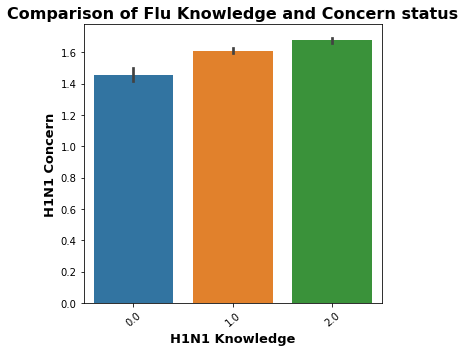

In [102]:
# Setting the size of the plot
plt.figure(figsize = (5,5))
# Creating the bar plot with X = h1n1_knowledge and Y = h1n1_concern
sns.barplot(data = df, x=df['h1n1_knowledge'], y=df['h1n1_concern'])
# Setting title and labels
plt.title('Comparison of Flu Knowledge and Concern status', fontsize=16, fontweight='bold')
plt.xlabel('H1N1 Knowledge', fontsize=13, fontweight='bold')
plt.ylabel('H1N1 Concern', fontsize=13, fontweight='bold')
# Rotating X ticks for legibility
plt.xticks(rotation = 40)
plt.tight_layout();

The bar plot aboive shows the raltive increase in curiousity and concern when knowlege of the h1n1 flu increases.

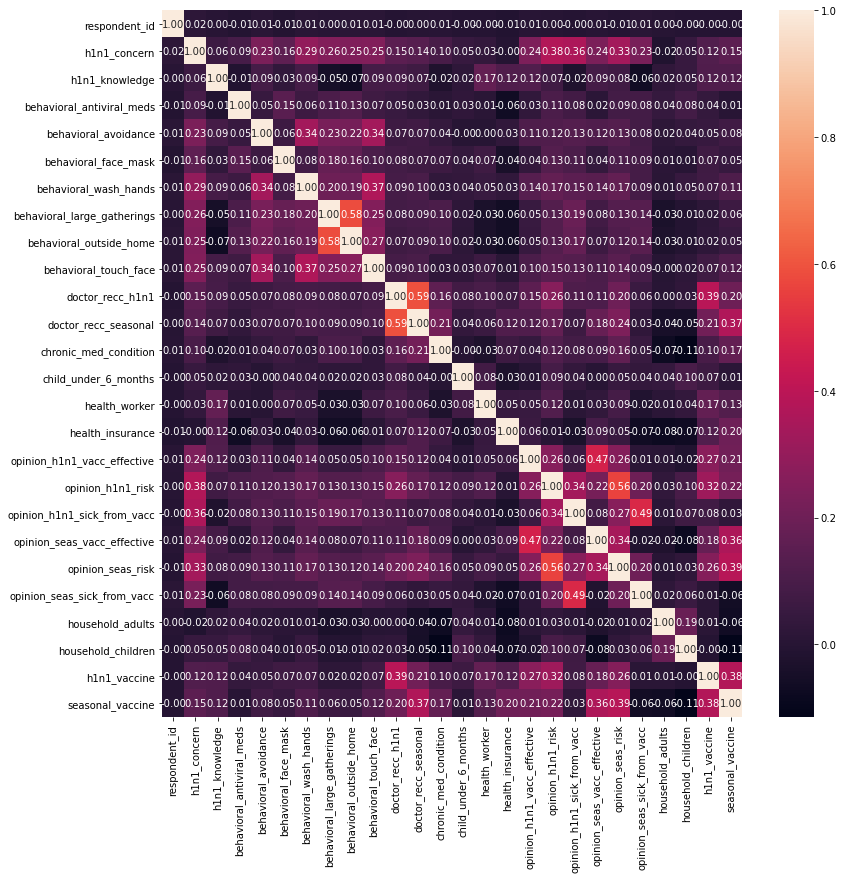

In [103]:
#visualizing any correlation between features.

plt.figure(figsize=(13,13))
sns.heatmap(df.corr(), annot= True, fmt='.2f');

The heatmap was evaluated for a potenetial presence of correlation between differnt features. It is noted that, no significant assoication observed for almost all features except for the very few ones.There is acorrelation between doctors recomneding H1N1 flu vaccine and seasonal flu.

## Data Preparation


Describe and justify the process for preparing the data for analysis.


Questions to consider:

Were there variables you dropped or created?
How did you address missing values or outliers?
Why are these choices appropriate given the data and the business problem?
Can you pipeline your preparation steps to use them consistently in the modeling process?

In [104]:
#Define our X and y
X = df.drop(columns = ['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine'], axis=1)
y = df['h1n1_vaccine']


# train test split
X_train, X_hold, y_train, y_hold = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

In [105]:
X.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [106]:
# Set up lists for columns requiring different treatment
num_cols = []
ohe_cols = []
freq_cols = []

for c in X.columns:
    if X[c].dtype in ['float64', 'int64']:
        num_cols.append(c)
    elif X[c].nunique() < 10:
        ohe_cols.append(c)
    else:
        freq_cols.append(c)

In [107]:
print(num_cols)
print('*'*100)
print(ohe_cols)
print('*'*100)
print(freq_cols)

['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults', 'household_children']
****************************************************************************************************
['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'census_msa']
****************************************************************************************************
['hhs_geo_region', 'employment_industry', 'employment_occupation']


In [108]:
# Pipeline Preprocessing
num_transformer = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='median')),
    ('minmaxscaler', MinMaxScaler())
    ])

ohe_transformer = Pipeline(steps=[
    ('ohe_imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('oh_encoder', OneHotEncoder(handle_unknown='ignore')) #no need to scale,ohe gives binary columns
])

freq_transformer = Pipeline(steps=[
    ('freq_encoder', ce.count.CountEncoder(normalize=True, min_group_size=.05)),
    # no need to scale, CountEncoder(normalize=True) scales them by normalizing
    ('freq_imputer', SimpleImputer(strategy='constant', fill_value=0))
])

In [109]:
# Package those pieces together using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('ohe', ohe_transformer, ohe_cols),
        ('freq', freq_transformer, freq_cols)
    ])

In [110]:
# train test split
X_tr, X_te, y_tr, y_te = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [111]:
preprocessor.fit(X_tr)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('num_imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['h1n1_concern', 'h1n1_knowledge',
                                  'behavioral_antiviral_meds',
                                  'behavioral_avoidance',
                                  'behavioral_face_mask',
                                  'behavioral_wash_hands',
                                  'behavioral_large_gatherings',
                                  'behavioral_outside_home',
                                  'behavioral_touch_face', '...
                                 ['age_group', 'education', 'race', 'sex',
                                  'income_poverty', 'marital_status',
                                  

In [112]:
# Just out of curiosity, see what this looks like 
X_tr_transformed = preprocessor.transform(X_tr)
X_tr_transformed.shape

(19228, 59)

In [113]:
pd.DataFrame(X_tr_transformed)

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,1.000000,0.5,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.106407,0.499168,0.504213
1,0.666667,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.160235,0.340961,0.371854
2,0.333333,0.5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.076659,0.499168,0.504213
3,0.333333,0.5,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.160235,0.499168,0.504213
4,0.333333,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.160235,0.340961,0.371854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19223,1.000000,0.5,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.117641,0.499168,0.504213
19224,0.333333,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.042958,0.499168,0.504213
19225,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.077855,0.093093,0.371854
19226,1.000000,0.5,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.121229,0.499168,0.504213


In [114]:
def evaluate(estimator, X_tr, X_te, y_tr, y_te):
    '''
    
    '''
    tr_preds = estimator.predict(X_tr)
    te_preds = estimator.predict(X_te)
    
    print('Training Scores:')
    print(f"Train Accuracy: {accuracy_score(y_tr, tr_preds)}")
    print(f"Train Precison: {precision_score(y_tr, tr_preds)}")
    print(f"Train Recall: {recall_score(y_tr, tr_preds)}")
    print(f"Train F1-Score: {f1_score(y_tr, tr_preds)}")
    print('*'*40)
    print('Test Scores:')
    print(f"Test Accuracy: {accuracy_score(y_te, te_preds)}")
    print(f"Test Precison: {precision_score(y_te, te_preds)}")
    print(f"Test Recall: {recall_score(y_te, te_preds)}")
    print(f"Test F1-Score: {f1_score(y_te, te_preds)}")
    
    # plot confusion matrix for test set
    plot_confusion_matrix(estimator, X_te, y_te, normalize='true')

## Baseline Understanding

   What does a baseline, model-less prediction look like?

#### 1st Model - "Dummy" Model

In [115]:
dummy_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DummyClassifier(strategy="most_frequent"))
])

In [116]:
dummy_model.fit(X_tr, y_tr)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['h1n1_concern',
                                                   'h1n1_knowledge',
                                                   'behavioral_antiviral_meds',
                                                   'behavioral_avoidance',
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                                                   'behavioral_large_gatherings',
                                 

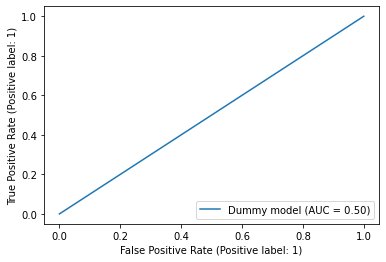

In [117]:
plot_roc_curve(dummy_model, X_tr, y_tr, name='Dummy model');

In [118]:
dummy_model.fit(X_tr, y_tr)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['h1n1_concern',
                                                   'h1n1_knowledge',
                                                   'behavioral_antiviral_meds',
                                                   'behavioral_avoidance',
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                                                   'behavioral_large_gatherings',
                                 

In [119]:
dummy_preds_tr= dummy_model.predict(X_tr)
dummy_preds_te= dummy_model.predict(X_te)

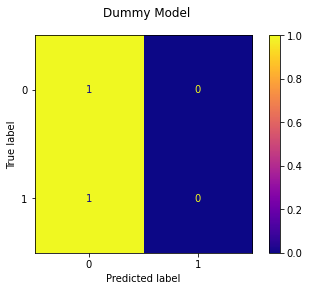

In [120]:
fig, ax = plt.subplots()

fig.suptitle("Dummy Model")

plot_confusion_matrix(dummy_model, X_te, y_te, ax=ax, cmap="plasma", normalize='true');

In [121]:
dummy_model.score(X_te, y_te)

0.7874376039933444

Training Scores:
Train Accuracy: 0.7875494071146245
Train Precison: 0.0
Train Recall: 0.0
Train F1-Score: 0.0
****************************************
Test Scores:
Test Accuracy: 0.7874376039933444
Test Precison: 0.0
Test Recall: 0.0
Test F1-Score: 0.0


C:\Users\tamev\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tamev\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


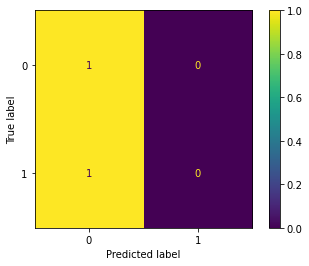

In [122]:
evaluate(dummy_model, X_tr, X_te, y_tr, y_te)

## Modeling Iterations

### MODEL 1: Decision Tree Classifier

In [123]:
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

In [124]:
cross_validate(clf, X_tr, y_tr, return_train_score=True)

{'fit_time': array([0.50085497, 0.49782395, 0.49921775, 0.5042069 , 0.49151993]),
 'score_time': array([0.06268358, 0.05857873, 0.04800224, 0.05068588, 0.05596709]),
 'test_score': array([0.74414977, 0.7475299 , 0.73972959, 0.7479844 , 0.74590377]),
 'train_score': array([1., 1., 1., 1., 1.])}

Overfitting observed.

In [125]:
# Let's do GridSearchCV
param_grid = {
    "classifier__max_depth": [1, 2, 5],
    "classifier__min_samples_split": [2, 10],
    "classifier__class_weight": ['balanced', None]   # we have class-imbalance issue, change the weights
}


In [126]:
grid = GridSearchCV(clf, param_grid, scoring=['f1','precision'], refit = 'f1')

In [127]:
output_clf = grid.fit(X_tr, y_tr)

In [128]:
output_clf.best_params_

{'classifier__class_weight': 'balanced',
 'classifier__max_depth': 5,
 'classifier__min_samples_split': 2}

In [129]:
output_clf.best_estimator_.fit(X_tr, y_tr)

te_preds = output_clf.best_estimator_.predict(X_te)

In [130]:
# pd.DataFrame(grid.cv_results_)  # if you want to see the details of each combination in the grid

In [131]:
# output_clf.best_estimator_

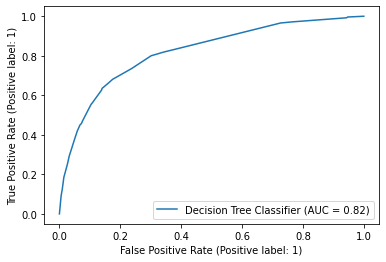

In [132]:
plot_roc_curve(output_clf.best_estimator_, X_te, y_te, name='Decision Tree Classifier'); 

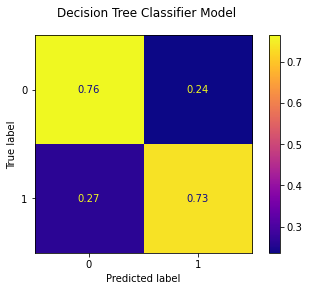

In [133]:
fig, ax = plt.subplots()

fig.suptitle("Decision Tree Classifier Model")

plot_confusion_matrix(output_clf.best_estimator_, X_te, y_te, ax=ax, cmap="plasma", normalize= 'true');

Training Scores:
Train Accuracy: 0.7556168088204701
Train Precison: 0.45372324389508595
Train Recall: 0.7368421052631579
Train F1-Score: 0.561619554062879
****************************************
Test Scores:
Test Accuracy: 0.757279534109817
Test Precison: 0.4559805707346691
Test Recall: 0.7348336594911937
Test F1-Score: 0.5627575871112777


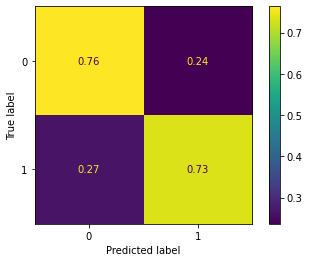

In [134]:
evaluate(output_clf.best_estimator_, X_tr, X_te, y_tr, y_te)

## MODEL 2: Logistic Regression

In [135]:
logreg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=500, random_state=42))
])

In [136]:
cross_validate(logreg, X_tr, y_tr, return_train_score=True)

{'fit_time': array([0.66697383, 0.58314681, 0.68173051, 0.58285093, 0.56733656]),
 'score_time': array([0.05965042, 0.07350087, 0.05194044, 0.04685211, 0.06749368]),
 'test_score': array([0.83229329, 0.83671347, 0.82891316, 0.84707412, 0.83146944]),
 'train_score': array([0.83773241, 0.8364972 , 0.83779743, 0.83384255, 0.83761295])}

In [137]:
# Let's do GridSearchCV
param_grid = {
    "classifier__solver": ['lbfgs', 'liblinear', 'newton-cg', 'saga'],
    "classifier__C" : [1, 0.1, 0.01], # regularization parameter
    "classifier__class_weight": ['balanced', None]
}

In [138]:
grid = GridSearchCV(logreg, param_grid, scoring=['f1','precision'], refit = 'f1')

In [139]:
output_logreg = grid.fit(X_tr, y_tr)

In [140]:
output_clf.best_params_

{'classifier__class_weight': 'balanced',
 'classifier__max_depth': 5,
 'classifier__min_samples_split': 2}

In [141]:
output_clf.best_estimator_.fit(X_tr, y_tr)

te_preds = output_clf.best_estimator_.predict(X_te)

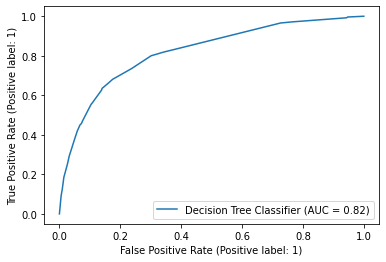

In [142]:
plot_roc_curve(output_clf.best_estimator_, X_te, y_te, name='Decision Tree Classifier'); 

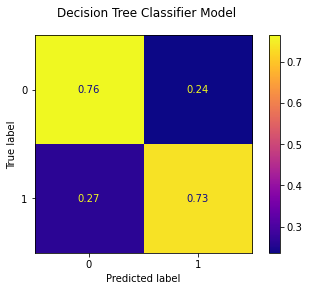

In [143]:
fig, ax = plt.subplots()

fig.suptitle("Decision Tree Classifier Model")

plot_confusion_matrix(output_clf.best_estimator_, X_te, y_te, ax=ax, cmap="plasma", normalize= 'true');

Training Scores:
Train Accuracy: 0.7556168088204701
Train Precison: 0.45372324389508595
Train Recall: 0.7368421052631579
Train F1-Score: 0.561619554062879
****************************************
Test Scores:
Test Accuracy: 0.757279534109817
Test Precison: 0.4559805707346691
Test Recall: 0.7348336594911937
Test F1-Score: 0.5627575871112777


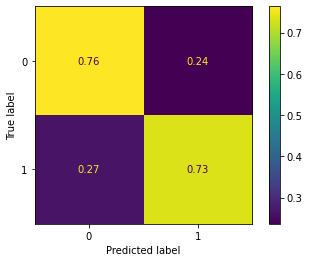

In [144]:
evaluate(output_clf.best_estimator_, X_tr, X_te, y_tr, y_te)

In [145]:
# pd.DataFrame(grid.cv_results_)  # if you want to see the details of each combination in the grid

## MODEL 3: Random Forest

In [146]:
rfc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])


In [147]:
cross_validate(rfc, X_tr, y_tr, return_train_score=True)

{'fit_time': array([3.18165731, 3.17729092, 3.19830322, 3.22355151, 3.20782232]),
 'score_time': array([0.20744181, 0.21241832, 0.21236682, 0.20476127, 0.20930815]),
 'test_score': array([0.83151326, 0.83281331, 0.8299532 , 0.83849155, 0.82626788]),
 'train_score': array([1., 1., 1., 1., 1.])}

In [148]:
# Let's do GridSearchCV
param_grid = {
    "classifier__n_estimators": [100, 200],
    "classifier__max_depth" : [2, 5], 
    "classifier__min_samples_leaf": [1, 2],
    "classifier__class_weight" :['balanced', 'balanced_subsample']  
    # class weight should be balanced or balanced_subsample - we have imbalance issue.
}

# we have 3*3*3*2 = 54 many random forest models to run!

In [149]:
grid = GridSearchCV(rfc, param_grid, scoring=['f1','precision'], refit = 'f1')

In [150]:
output_rfc = grid.fit(X_tr, y_tr)

In [151]:
output_rfc.best_params_

{'classifier__class_weight': 'balanced_subsample',
 'classifier__max_depth': 5,
 'classifier__min_samples_leaf': 1,
 'classifier__n_estimators': 200}

In [152]:
output_rfc.best_estimator_.fit(X_tr, y_tr)

te_preds_rfc = output_rfc.best_estimator_.predict(X_te)

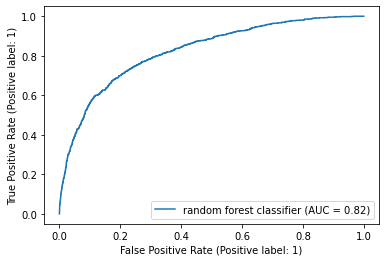

In [153]:
plot_roc_curve(output_rfc.best_estimator_, X_te, y_te, name='random forest classifier');

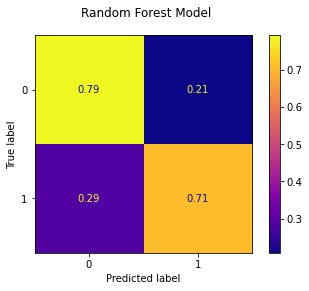

In [154]:
fig, ax = plt.subplots()

fig.suptitle("Random Forest Model")

plot_confusion_matrix(output_rfc.best_estimator_, X_te, y_te, ax=ax, cmap="plasma", normalize='true');

Training Scores:
Train Accuracy: 0.7770959018098607
Train Precison: 0.4834185777924435
Train Recall: 0.7172582619339045
Train F1-Score: 0.5775675142913463
****************************************
Test Scores:
Test Accuracy: 0.7741264559068219
Test Precison: 0.47886393659180976
Test Recall: 0.7093933463796478
Test F1-Score: 0.5717665615141956


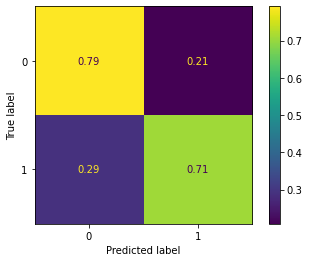

In [155]:
evaluate(output_rfc.best_estimator_, X_tr, X_te, y_tr, y_te)

## MODEL 4: Gradient Boosting Classifier

In [156]:
gbc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

In [164]:
cross_validate(gbc, X_tr, y_tr, return_train_score=True)

{'fit_time': array([6.0407927 , 5.88735247, 6.13442349, 6.12557793, 6.03123713]),
 'score_time': array([0.0571661 , 0.06399488, 0.06001663, 0.06364751, 0.07892323]),
 'test_score': array([0.83411336, 0.83983359, 0.82969319, 0.84395319, 0.8319896 ]),
 'train_score': array([0.84605383, 0.84436354, 0.84579378, 0.84333355, 0.84560879])}

In [165]:
# Let's do GridSearchCV
param_grid = {
    "classifier__n_estimators": [100, 200],
    "classifier__max_depth" : [1, 2, 5], 
    "classifier__learning_rate": [1, 0.1, 0.01],
}
# we have 2*3*3 = 18 many gradient boosting classifier models to run!

In [166]:
grid = GridSearchCV(gbc, param_grid, scoring=['f1','precision'], refit = 'f1') # 2*3*3*5 for CV

In [167]:
output_gbc = grid.fit(X_tr, y_tr)

C:\Users\tamev\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tamev\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tamev\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tamev\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision 

In [168]:
output_gbc.best_params_

{'classifier__learning_rate': 0.1,
 'classifier__max_depth': 5,
 'classifier__n_estimators': 200}

In [170]:
output_gbc.best_estimator_.fit(X_tr, y_tr)

te_preds_gbc = output_gbc.best_estimator_.predict(X_te)


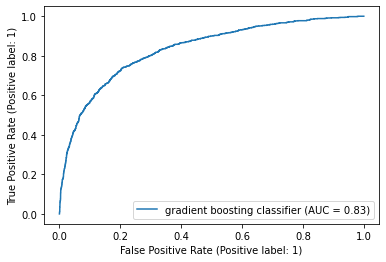

In [171]:
plot_roc_curve(output_gbc.best_estimator_, X_te, y_te, name='gradient boosting classifier');

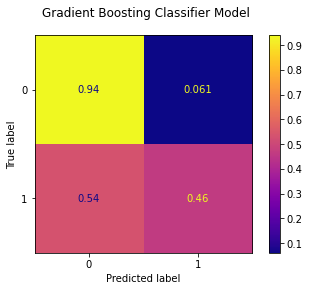

In [172]:
fig, ax = plt.subplots()

fig.suptitle("Gradient Boosting Classifier Model")

plot_confusion_matrix(output_gbc.best_estimator_, X_te, y_te, ax=ax, cmap="plasma", normalize='true');

Training Scores:
Train Accuracy: 0.888755980861244
Train Precison: 0.8318553888130968
Train Recall: 0.597062423500612
Train F1-Score: 0.695168875587858
****************************************
Test Scores:
Test Accuracy: 0.8381863560732113
Test Precison: 0.6732954545454546
Test Recall: 0.4637964774951076
Test F1-Score: 0.5492468134414832


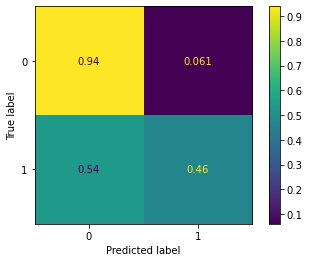

In [173]:
evaluate(output_gbc.best_estimator_, X_tr, X_te, y_tr, y_te)

## Modeling

Describe and justify the process for analyzing or modeling the data.

Questions to consider:

- How will you analyze the data to arrive at an initial approach?
- How will you iterate on your initial approach to make it better?
- What model type is most appropriate, given the data and the business problem?

## Evaluation

The evaluation of each model should accompany the creation of each model, and you should be sure to evaluate your models consistently.

Evaluate how well your work solves the stated business problem. 

Questions to consider:

- How do you interpret the results?
- How well does your model fit your data? How much better is this than your baseline model? Is it over or under fit?
- How well does your model/data fit any relevant modeling assumptions?

For the final model, you might also consider:

- How confident are you that your results would generalize beyond the data you have?
- How confident are you that this model would benefit the business if put into use?
- What does this final model tell you about the relationship between your inputs and outputs?

### Baseline Understanding

- What does a baseline, model-less prediction look like?

In [157]:
# code here to arrive at a baseline prediction

### First $&(@# Model

Before going too far down the data preparation rabbit hole, be sure to check your work against a first 'substandard' model! What is the easiest way for you to find out how hard your problem is?

In [158]:
# code here for your first 'substandard' model

In [159]:
# code here to evaluate your first 'substandard' model

### Modeling Iterations

Now you can start to use the results of your first model to iterate - there are many options!

In [160]:
# code here to iteratively improve your models

In [161]:
# code here to evaluate your iterations

### 'Final' Model

In the end, you'll arrive at a 'final' model - aka the one you'll use to make your recommendations/conclusions. This likely blends any group work. It might not be the one with the highest scores, but instead might be considered 'final' or 'best' for other reasons.

In [162]:
# code here to show your final model

In [163]:
# code here to evaluate your final model

## Conclusions

Provide your conclusions about the work you've done, including any limitations or next steps.

Questions to consider:

- What would you recommend the business do as a result of this work?
- How could the stakeholder use your model effectively?
- What are some reasons why your analysis might not fully solve the business problem?
- What else could you do in the future to improve this project (future work)?
